In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data = pd.read_csv('working.csv')

In [3]:
# df=data[['GenderSelect','Age_cat','FormalEducation','Major',\
#         'Tenure','FirstTrainingSelect','EmploymentStatus',\
#        'LearningCategoryWork','LearningCategorySelftTaught',\
#        'LearningCategoryOnlineCourses','LearningCategoryUniversity',\
#        'LearningCategoryKaggle']].dropna()

In [4]:
df=data[['GenderSelect','Age_cat','FormalEducation','Major',\
        'Tenure','FirstTrainingSelect','EmploymentStatus']].dropna()

In [5]:

df['status']=df['EmploymentStatus'].apply(lambda x: 1 if x=='Employed full-time' else 0)

In [6]:
import math

math.exp(.59)

1.803988415397857

In [7]:
from patsy import dmatrices
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.discrete.discrete_model as sm

y, X = dmatrices("status ~ C(GenderSelect, Treatment(reference='Male'))\
+C(Age_cat)+C(Major)+C(FormalEducation)+C(Tenure)+C(FirstTrainingSelect, Treatment(reference='University courses'))", df)
logit = sm.Logit(y, X)
result = logit.fit(method='ncg')
result.summary2()

Optimization terminated successfully.
         Current function value: 0.423319
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 28
         Hessian evaluations: 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                                           Results: Logit
====================================================================================================================================================================
Model:                                                Logit                                            Pseudo R-squared:                                 0.386      
Dependent Variable:                                   status                                           AIC:                                              1184.2608  
Date:                                                 2019-07-25 10:31                                 BIC:                                              1324.5713  
No. Observations:                                     1335                                             Log-Likelihood:                                   -565.13    
Df Model:                                             26                                               LL-Null:                                          -920.22    
Df Residuals:                                         1308                                             LLR p-value:                                      5.3212e-133
Converged:                                            1.0000                                           Scale:                                            1.0000     
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                                                  Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                         -1.4616   0.3181 -4.5940 0.0000   -2.0851  -0.8380
C(GenderSelect, Treatment(reference='Male'))[T.Female]                                                            -0.5938   0.1870 -3.1756 0.0015   -0.9603  -0.2273
C(Age_cat)[T.30 and less]                                                                                         -0.3019   0.1977 -1.5270 0.1268   -0.6894   0.0856
C(Age_cat)[T.40 - 50]                                                                                             -0.7567   0.2541 -2.9782 0.0029   -1.2547  -0.2587
C(Age_cat)[T.over 50]                                                                                             -1.9328   0.3177 -6.0844 0.0000   -2.5554  -1.3102
C(Major)[T.Engineering]                                                                                            0.4420   0.2321  1.9041 0.0569   -0.0130   0.8969
C(Major)[T.Health Science and Biology]                                                                             0.9687   0.3657  2.6485 0.0081    0.2518   1.6855
C(Major)[T.Humanities and Art]                                                                                     1.6263   0.4422  3.6778 0.0002    0.7596   2.4930
C(Major)[T.Information Technology and Managment]                                                                   0.1864   0.4337  0.4297 0.6674   -0.6637   1.0364
C(Major)[T.Mathematics or statistics]                                                                              1.3142   0.2405  5.4640 0.0000    0.8428   1.7856
C(Major)[T.No declared major]                                                                                      0.6521   1.3152  0.4958 0.6200   -1.9257   3.2300
C(Major)[T.Other]                                                                                                  0.7911   0.3380  2.3408 0.0192    0.1287   1.4535
C(Major)[T.Physics]                                               

In [8]:
def probability(gender='Male',age_group='30-40',\
                major='Computer Science',\
                education='Bachelor', tenure='1 to 2 years'):
        param=result.params[0]
        if gender=='Female':
            param+=result.params[1]
        else:
            pass
        if age_group=='30 and less':
                param+=result.params[2]
        elif age_group=='40-50':
                param+=result.params[3]
        elif age_group=='over 50':
                param+=result.params[4]
        else: 
            pass
        if major=='Engineering':
                param+=result.params[5]
        elif major=='Health Science or Biology':
                param+=result.params[6]
        elif major=='Humanities and Art':
                param+=result.params[7]
        elif major=='Information Technology and Managment':
                param+=result.params[8]
        elif major=='Mathematics or Statistics':
                param+=result.params[9]
        elif major=='No declared major':
                param+=result.params[10]
        elif major=='Other':
                param+=result.params[11]
        elif major=='Physics':
                param+=result.params[12]
        elif major=='Social Science':
                param+=result.params[13]
        else: 
            pass
        if education=='Doctoral degree':
                param+=result.params[14]
        elif education=="Master's degree":
                param+=result.params[15]
        else:
            pass
        if tenure=='3 to 5 years':
            param+=result.params[17]
        if tenure=='6 to 10 years':
            param+=result.params[18]
        if tenure=='Less than a year':
            param+=result.params[20]
        else:
            pass
        probability= int (round((np.exp(param)/(1+np.exp(param)))*100,0))
        return probability



In [9]:
def df_prob(major, education,tenure):
    gender=['Male','Female']
    age=['30 and less','30-40','40-50','over 50']
    probs=[]
    for g in gender:
        for a in age:
            probs.append(probability(g, a, major, education, tenure))
    age_group=['30 and less','30-40','40-50','over 50']*2
    gender=['male']*4+['female']*4
    df = pd.DataFrame(list(zip(age_group,probs, gender)),\
                      columns=['age','prob', 'gender'])
    df_prob=pd.pivot_table(df, index=['gender'], values=['prob'], \
                   columns='age',aggfunc='mean').T.\
    reset_index().iloc[:,1:].sort_index()
    return df_prob


In [16]:
df['Tenure'].unique().tolist()[:-1]

['6 to 10 years',
 '3 to 5 years',
 'More than 10 years',
 'Less than a year',
 '1 to 2 years']

In [17]:
# df['']

In [73]:
df_prob('Mathematics or Statistics', "Bachelor's degree",'3 to 5 years')

gender,age,female,male
0,30 and less,61,74
1,30-40,68,80
2,40-50,50,65
3,over 50,24,36


In [10]:
def probability_plot(Major):
    educ_tenure=[(x, y) for x in ["Bachelor's degree","Master's degree","Doctoral degree"] \
        for y in ['Less than a year','1 to 2 years','3 to 5 years','6 to 10 years']]

    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
    plt.tight_layout(h_pad=7)
    for ax,y in zip(axes.flat, educ_tenure):
        df_prob(Major,y[0], y[1])[[ 'female','male']].plot(kind='bar',
               color=['teal','darkslateblue'],ax=ax,\
                              fontsize=13, alpha=.8,width=.7)
        leg=ax.legend().set_visible(False)
        ax.set_title("Probability of DS Employment\n"+Major+"\n"+y[0]+' with Coding '+y[1],\
                  x=.5, fontsize=14,family='serif')
        for i in ax.patches:
            ax.text( i.get_x(),i.get_height()+2, \
            '{:.0f} %'.format(i.get_height()), fontsize=10)      
        leg=ax.legend().set_visible(False)
        ax.set_facecolor('white')
        ax.yaxis.set_ticks_position('none')
        ax.set_ylim([0,110])
        ax.tick_params(axis='y', labelsize=9)
        ax.tick_params(axis='y', which='minor', labelsize=1)
        ax.set_xticklabels(df_prob(Major, y[0],y[1])['age'].sort_index(),
             size =13,family='serif', color='black',rotation='horizontal')
    x = np.arange(4)
    leg=ax.legend(['Male','Female'],  ncol=2,loc='lower right', \
          fontsize=13,prop={'size':20},bbox_to_anchor=(-.7, -.3))
    leg.legendHandles[0].set_color('darkslateblue')
    leg.legendHandles[1].set_color('teal')
    leg.get_frame().set_facecolor('none')
    leg.get_frame().set_edgecolor('none')
    plt.show()
    return probability_plot

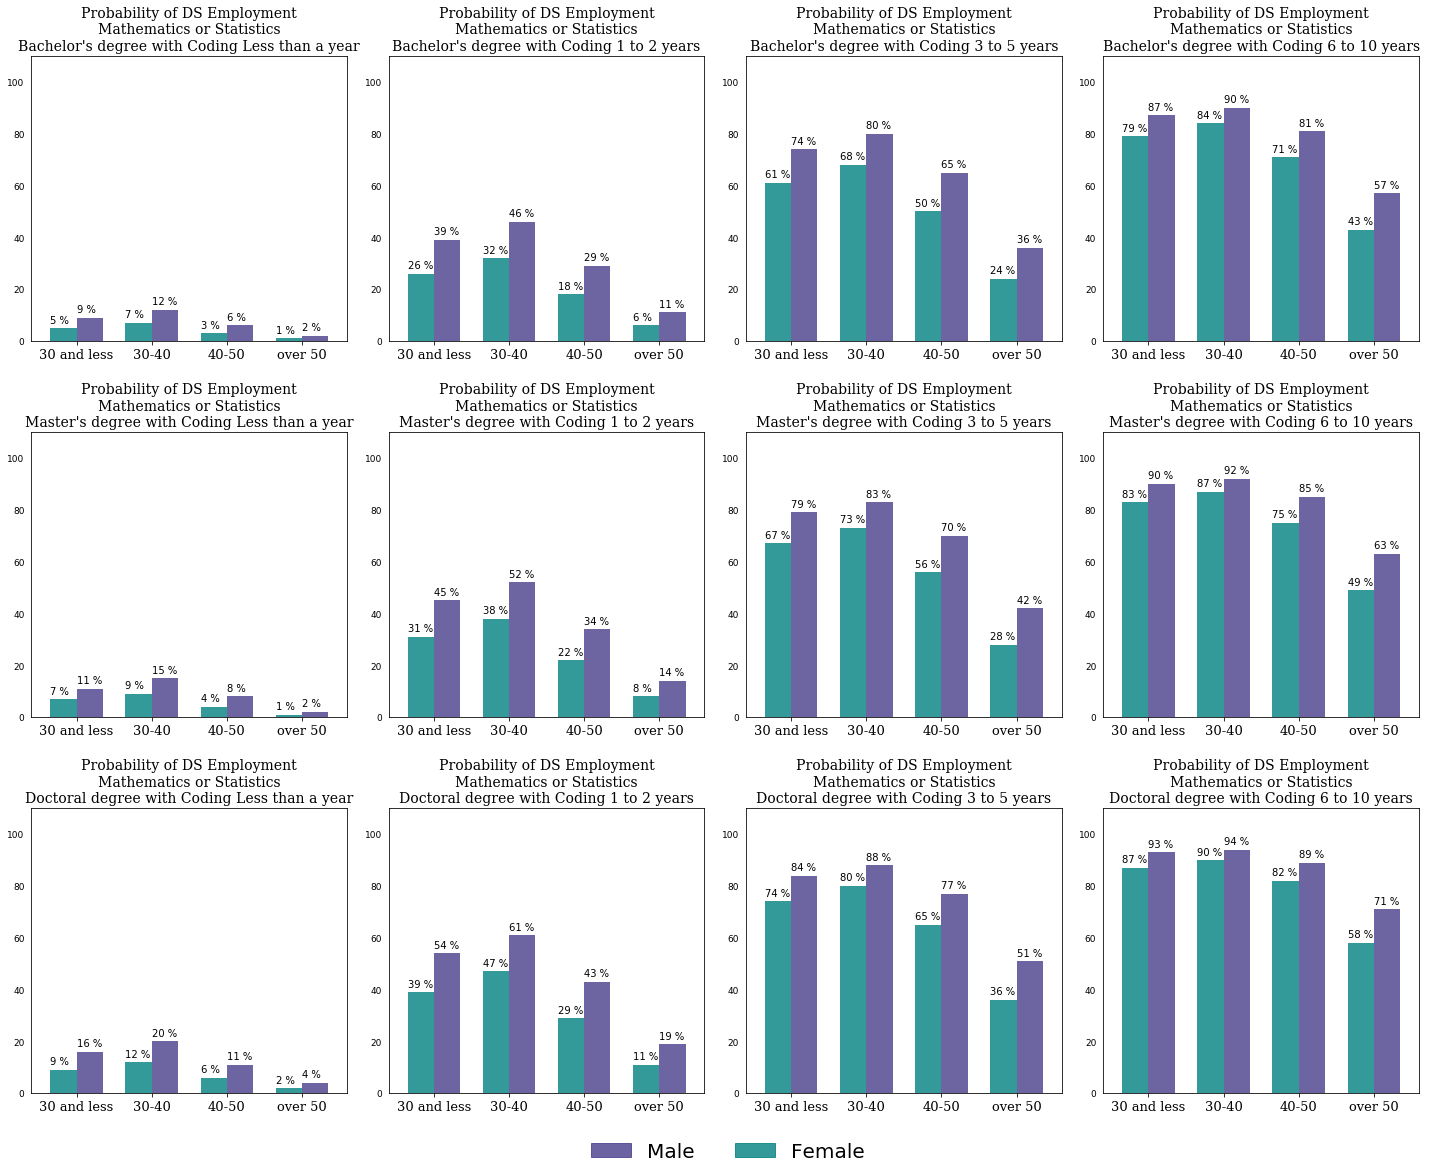

<function __main__.probability_plot(Major)>

In [12]:
probability_plot('Mathematics or Statistics')

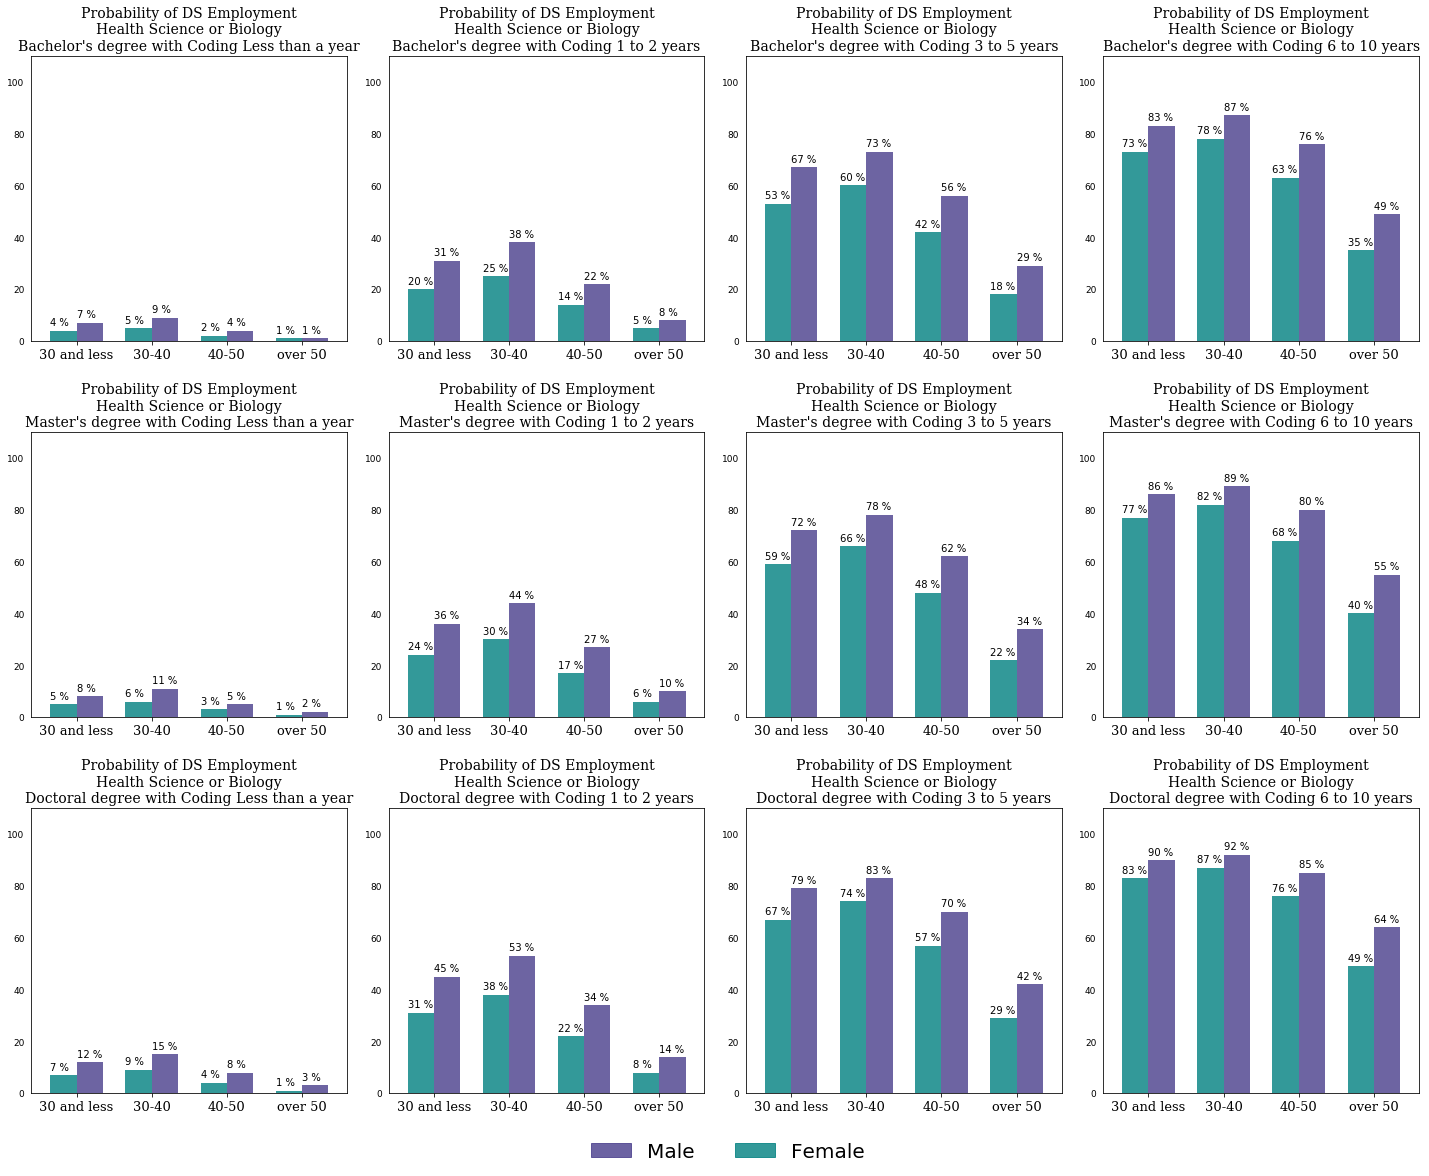

<function __main__.probability_plot(Major)>

In [16]:
probability_plot('Health Science or Biology')

In [36]:
df['Major'].value_counts()

Engineering                             283
Computer Science                        275
Mathematics or statistics               244
Social Science                          143
Physics                                 112
Other                                   88 
Health Science and Biology              76 
Information Technology and Managment    58 
Humanities and Art                      51 
No declared major                       5  
Name: Major, dtype: int64